<img src="img/img_covid.jpg">

# Análise da COVID-19 no Brasil

O Coronavírus (COVID-19) é uma doença infecciosa causada por um vírus que resulta em problemas respiratórios semelhantes à gripe. Seus principais sintomas são tosse, febre e, em casos mais graves, dificuldade para respirar.

O Brasil teve seu primeiro caso confirmado de Coronavírus no dia 26/02/2020 na cidade de São Paulo e após 14 dias o país começou a passar por algumas mudanças em sua rotina, como por exemplo, suspensão de aulas e eventos de grande porte, fechamento de lojas, bares, restaurantes e shoppings, além de recomendações incentivando o isolamento social no combate à doença. Um mês após o primeiro caso, diversas cidades encontravam-se com as ruas vazias devido as medidas de isolamento.

Dia 21/03 o brasil atingiu a marca de 1000 casos e em pouco mais de um mês contabilizava 50000 contaminados, ou seja, o virus levou 34 dias para contaminar 50000 pessoas e após isso levou apenas 9 dias para dobrar esse valor, o número de casos vem subindo exponencialmente desde o início da pandemia e até o presente momento não sabemos exatamente quando será o pico da doença.

<hr style="height:1px;border-width:0;color:gray;background-color:#C0C0C0">

Nesse projeto farei uma análise mostrando a evolução da doença no país e nos estados com o maior número de casos, utilizando a base de dados do Painel Coronavírus (https://covid.saude.gov.br/)



In [1]:
#Importando as bibliotecas que utilizarei nesse projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Carregando o dataset
cv = pd.read_csv('datasets/arquivo_geral.csv',sep=';')

### Analise inicial e tratamento dos dados

In [3]:
#lendo os 5 primeiros itens do dataset
cv.head()

regiao estado        data  casosNovos  casosAcumulados  obitosNovos  \
0  Norte     RO  2020-01-30           0                0            0   
1  Norte     RO  2020-01-31           0                0            0   
2  Norte     RO  2020-02-01           0                0            0   
3  Norte     RO  2020-02-02           0                0            0   
4  Norte     RO  2020-02-03           0                0            0   

   obitosAcumulados  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0

In [4]:
#Verificando as colunas, tipo de dados e se há dados faltando
cv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727 entries, 0 to 2726
Data columns (total 7 columns):
regiao              2727 non-null object
estado              2727 non-null object
data                2727 non-null object
casosNovos          2727 non-null int64
casosAcumulados     2727 non-null int64
obitosNovos         2727 non-null int64
obitosAcumulados    2727 non-null int64
dtypes: int64(4), object(3)
memory usage: 149.2+ KB


In [5]:
#Gerando algumas estatisticas dos dados
cv.describe()

casosNovos  casosAcumulados  obitosNovos  obitosAcumulados
count  2727.000000      2727.000000  2727.000000       2727.000000
mean     57.183352       787.670700     3.896956         51.525486
std     204.582108      2945.525757    16.570267        237.048798
min       0.000000         0.000000    -2.000000          0.000000
25%       0.000000         0.000000     0.000000          0.000000
50%       1.000000         7.000000     0.000000          0.000000
75%      29.000000       350.000000     1.000000         11.000000
max    3800.000000     44411.000000   224.000000       3608.000000

In [6]:
#criando um dataframe sem todas aquelas informações de data repetidas

#Seleciona a data mostrando apenas UMA vez cada data
lista_data = cv['data'].unique()

#Criando listas para armazenar os dados na mesma quantidade da lista com as datas
lista_casosAcumulados = []
lista_obitosAcumulados = []
lista_casosNovos = []
lista_obitosNovos = []

#Criado um laço que para cada iteração do dia ele grave nas listas a soma dos valores
#daquele dia em todos os estados
for dia in range(len(lista_data)):
    lista_casosAcumulados.append(cv[cv['data'] == lista_data[dia]]['casosAcumulados'].sum())
    lista_casosNovos.append(cv[cv['data'] == lista_data[dia]]['casosNovos'].sum())
    lista_obitosAcumulados.append(cv[cv['data'] == lista_data[dia]]['obitosAcumulados'].sum())
    lista_obitosNovos.append(cv[cv['data'] == lista_data[dia]]['obitosNovos'].sum())
    
#Transfomo as listas em Series
data = pd.Series(lista_data)
casosAcumulados = pd.Series(lista_casosAcumulados)
obitosAcumulados = pd.Series(lista_obitosAcumulados)
casosNovos = pd.Series(lista_casosNovos)
obitosNovos = pd.Series(lista_obitosNovos)

#Crio um DataFrame a partir da data
df_por_data = data.to_frame(name='data')

#Cria as colunas com os dados no Dataframe
df_por_data['casosAcumulados'] = casosAcumulados
df_por_data['obitosAcumulados'] = obitosAcumulados
df_por_data['casosNovos'] = casosNovos
df_por_data['obitosNovos'] = obitosNovos

df_por_data.head()

data  casosAcumulados  obitosAcumulados  casosNovos  obitosNovos
0  2020-01-30                0                 0           0            0
1  2020-01-31                0                 0           0            0
2  2020-02-01                0                 0           0            0
3  2020-02-02                0                 0           0            0
4  2020-02-03                0                 0           0            0

In [7]:
#Aumento percentual por dia
def perc(coluna):
    lista_percents = []
    for i in range(coluna.shape[0]):
        if i == 0:
            lista_percents.append(0)
        elif coluna[i] == 1 and coluna[i-1] == 0:
            lista_percents.append(100.00)
        else:
            if coluna[i] == 0 and coluna[i-1] == 0:
                lista_percents.append(0)
            else:
                diferenca = coluna[i] - coluna[i-1]
                lista_percents.append(round((diferenca / coluna[i-1]) * 100,2))
    return pd.Series(lista_percents)

In [8]:
#Criando a coluna acresDiaAnterior
df_por_data['aumentoPercent'] = perc(df_por_data['casosAcumulados'])
df_por_data.tail(1)

data  casosAcumulados  obitosAcumulados  casosNovos  obitosNovos  \
100  2020-05-09           155939             10627       10611          730   

     aumentoPercent  
100             7.3

In [9]:
#Casos por semana

df_semana = df_por_data.copy()

df_semana['data'] = pd.to_datetime(df_semana['data'])
#datinha = df_semana['dh'].iloc[0]
#datinha.weekofyear

df_semana['semana'] = df_semana['data'].apply(lambda data: data.weekofyear)
#df_semana.tail()
semana = df_semana['semana'].unique()
soma_contaminados_semana = []
soma_mortos_semana = []
for i in semana:
    soma_contaminados_semana.append(df_semana[df_semana['semana'] == i]['casosNovos'].sum())
    soma_mortos_semana.append(df_semana[df_semana['semana'] == i]['obitosNovos'].sum())

semana = pd.Series(semana)
semana_df = semana.to_frame(name='semana')
semana_df['casos_semana'] = soma_contaminados_semana
semana_df['mortos_semana'] = soma_mortos_semana

# Dados da doença no Brasil

### Casos confirmados, Óbitos e Letalidade

In [10]:
print('Atualmente no Brasil temos um total de {a} Casos de COVID-19 e {b} obitos. A letalidade dessa doença é de {c}%'
      .format(a=df_por_data['casosNovos'].sum(),b=df_por_data['obitosNovos'].sum(),c=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,1)))

Atualmente no Brasil temos um total de 155939 Casos de COVID-19 e 10627 obitos. A letalidade dessa doença é de 6.8%


### Estados com mais casos confirmados

In [11]:
#Pega sempre a informação do ultimo dia do dataset
ultimo_dia = cv[['casosAcumulados','data']].max()[1]

#Filtra os casos acumulados por estado com a maior quantiddade de casos
maior_n_casos = cv[cv['data'] == ultimo_dia][['estado','casosAcumulados']].sort_values(by='casosAcumulados',ascending=False)
#Corrige o indice
maior_n_casos.reset_index(inplace=True,drop=True)
#Renomeia as colunas
maior_n_casos.columns = [['Estado','Total de Casos']]
#imprime os 5 primeiros
maior_n_casos.head()

Estado Total de Casos
0     SP          44411
1     RJ          16929
2     CE          15879
3     PE          12470
4     AM          11925

A listagem acima mostra os 5 estados que possuem o maior número de casos confirmados. É importante observar que entre eles estão os estados mais populosos do país, SP e RJ, tornando-se mais propício a propagação do vírus. Desde o início da pandemia, o estado de São Paulo concentra o maior número de casos confirmados do Brasil.

### Estados com menos casos confirmados

In [12]:
#Seleciona os estados com o menor numero de caso
maior_n_casos.tail()

Estado Total de Casos
22     RR           1202
23     GO           1069
24     TO            572
25     MT            502
26     MS            346

Esses são os estados com menor número de casos confirmados. O estado de Mato Grosso do Sul concentra um número de 346 pessoas contaminadas. Se compararmos com o estado de São Paulo, o número é 128 vezes menor. Isso pode estar relacionado a diversos fatores, entre eles, menor número de habitantes, maior empenho nas medidas de combate ao Coronavirus, ou até mesmo a subnotificação dos casos, um problema que vem sendo levantado por diversos canais de noticias em todo o país.

### Evolução da doença por dia no Brasil

In [13]:
#Setando um fundo branco nos gráficos
sns.set_style("whitegrid")

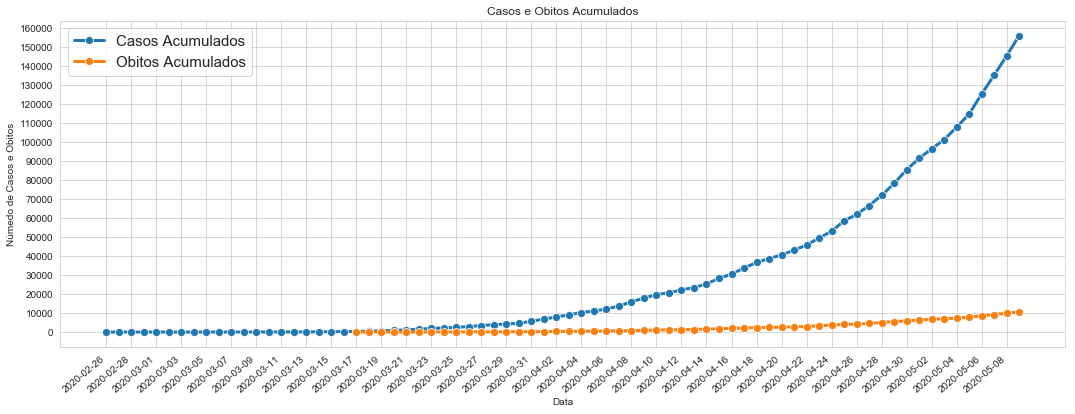

O gráfico acima mostra a evolução da doença no país desde o primeiro caso confirmado. 
Nele é possível observar que os casos confirmados estão aumentando em média 10.54% por dia, ainda sem sinal de diminuição. E o número de mortos corresponde a 6.8% dos casos confirmados.


In [14]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data)

plt.figure(figsize=(18,6))
#Gerando gráfico de linha
sns.lineplot(x='data',y=df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Casos Acumulados')
sns.lineplot(x='data',y=df_por_data[df_por_data['obitosAcumulados'] > 0]['obitosAcumulados'],data=df_por_data,lw=3,marker='o',
             markersize=8,label='Obitos Acumulados')

#Aumenta a legenda
plt.yticks(np.arange(0,df_por_data[df_por_data['casosAcumulados'] > 0]['casosAcumulados'].max() + 5000,10000))
#Inclina o X e mostra os dias de maneira espaçada
plt.xticks(df_por_data['data'][27::2],rotation=40, horizontalalignment='right')
#Insere o título e a descrição de X e Y
plt.title('Casos e Obitos Acumulados')
plt.ylabel('Númedo de Casos e Obitos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15

plt.legend()
plt.show()

perc = df_por_data[(df_por_data['aumentoPercent'] > 0) & (df_por_data['aumentoPercent'] < 100)]['aumentoPercent'].median()
print("O gráfico acima mostra a evolução da doença no país desde o primeiro caso confirmado. \nNele é possível observar que os casos confirmados estão aumentando em média {a}% por dia, ainda sem sinal de diminuição. E o número de mortos corresponde a {b}% dos casos confirmados."
     .format(a=perc,b=round(df_por_data['obitosNovos'].sum()/df_por_data['casosNovos'].sum() * 100,1)))

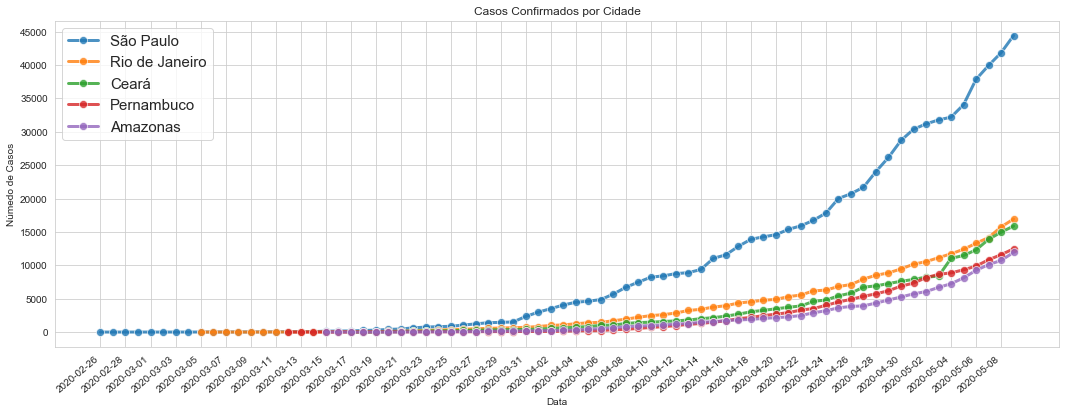

In [15]:
#IMPRESSÃO DO GRAFICO (Casos e Obitos Acumulados x Data) DOS ESTADOS MAIS ATINGIDOS

plt.figure(figsize=(18,6))
#Gerando gráfico de linha
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='São Paulo',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'RJ')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Rio de Janeiro',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'CE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Ceará',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'PE')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Pernambuco',alpha=0.8)
sns.lineplot(x='data',y=cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'AM')]['casosAcumulados'],data=cv,lw=3,marker='o',
             markersize=8,label='Amazonas',alpha=0.8)
#Aumenta a legenda
plt.yticks(np.arange(0,cv[(cv['casosAcumulados'] > 0) & (cv['estado'] == 'SP')]['casosAcumulados'].max() + 1000,5000))
#Inclina o X e mostra os dias de maneira espaçada
plt.xticks(df_por_data['data'][27::2],rotation=40, horizontalalignment='right')
plt.title('Casos Confirmados por Cidade')
plt.ylabel('Númedo de Casos')
plt.xlabel('Data')

#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 15
plt.legend()
plt.show()

Este outro gráfico compara o crescimento dos casos apenas nas cidades mais afetadas, São Paulo, Rio de Janeiro, Ceará, Pernambuco e Amazonas. Podemos observar que o avanço da doença no estado de São Paulo é o mais agressivo.

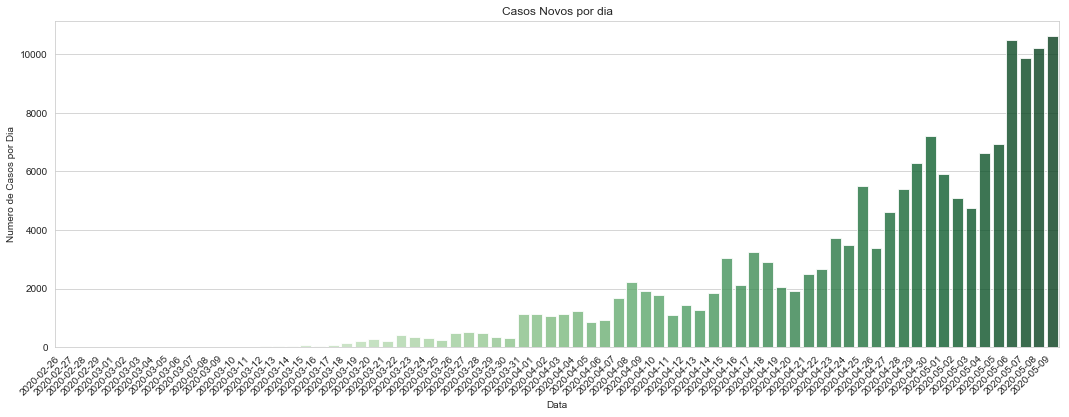

In [16]:
#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,6))
#Cria um gráfico de barras
sns.barplot(x=df_por_data[df_por_data['data'] >= '2020-02-26']['data'],y=df_por_data[df_por_data['casosNovos'] >= 1]['casosNovos'],
            data=df_por_data,palette='Greens',alpha=0.8)

#Inclina a escala
plt.xticks(rotation=45, horizontalalignment='right')

#Insere o título e a descrição de X e Y
plt.title('Casos Novos por dia')
plt.ylabel('Numero de Casos por Dia')
plt.xlabel('Data')

plt.show()



É possível observar o aumento no número de casos a cada dia. O número de novos contágios apresenta diminuição em determinados dias, mas infelizmente volta a crescer. O registro mais alto até o momento foi de 10611 novos casos em um dia.

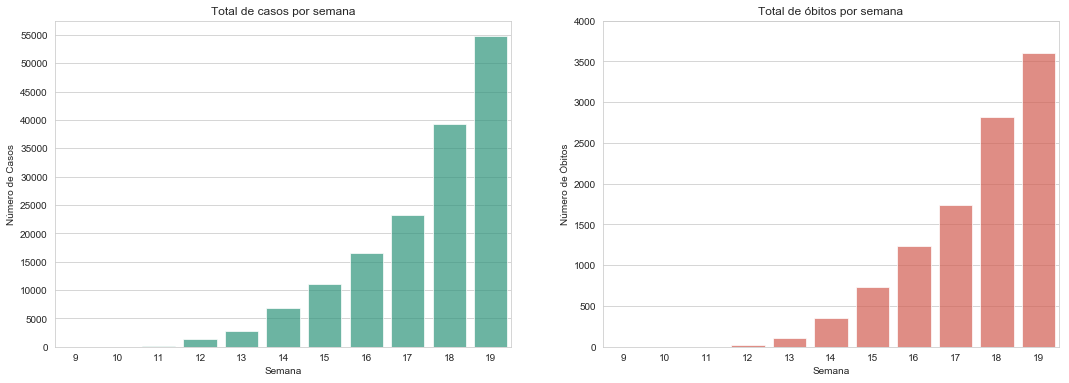

In [17]:
#Cria subplot com 1 linha e 2 colunas
f, axes = plt.subplots(1, 2,figsize=(18,6))

#Cria o gráfico com os casos confirmados na coluna 0
sns.barplot(x=semana_df[semana_df['semana'] >= 9]['semana'],y='casos_semana',data=semana_df,color='#1DA584',alpha=0.7,ax=axes[0])
axes[0].set_yticks(np.arange(0,semana_df['casos_semana'].max()+1000,5000))
axes[0].set_title('Total de casos por semana')
axes[0].set_ylabel('Número de Casos')
axes[0].set_xlabel('Semana')

#Cria o gráfico com os óbitos confirmados na coluna 1
sns.barplot(x=semana_df[semana_df['semana'] >= 9]['semana'],y='mortos_semana',data=semana_df,color='#e74c3c',alpha=0.7,ax=axes[1])
axes[1].set_yticks(np.arange(0,semana_df['mortos_semana'].max()+500,500))#,3000))
axes[1].set_title('Total de óbitos por semana')
axes[1].set_ylabel('Número de Óbitos')
axes[1].set_xlabel('Semana')

plt.show()

Acima temos a evolução da doença por semana epidemiológica, o gráfico da esquerda mostra o crescimento no número de contaminados, nele é possível observar que os números vêm dobrado a cada duas semanas, atualmente temos mais de 50000 pessoas infectadas pelo coronavírus só na ultima semana. No gráfico localizado a direita a situação é semelhante com os óbitos a quantidade também vêm dobrando a cada duas semanas contabilizando mais de 3000 mortos pela doença na última semana.

### Quantidade de infectados e óbitos por região e estado

              Casos Confirmados
regiao                         
Sudeste                   68875
Nordeste                  49356
Norte                     25565
Sul                        7650
Centro-Oeste               4493


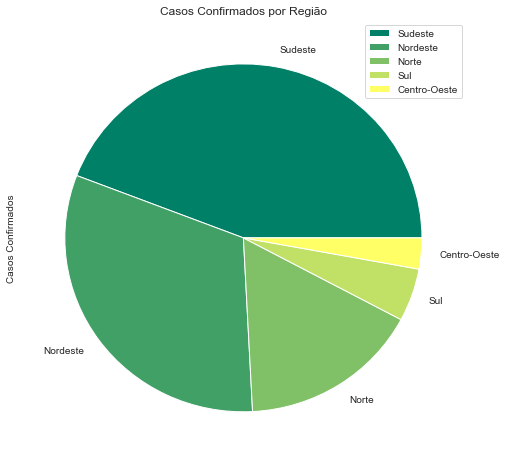

In [18]:
#Fazer grafico de casos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
total_casos_por_regiao.columns = ['Casos Confirmados']
#Imprime o total de casos confirmados por região
print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),cmap='summer')
#Insere o título
plt.title('Casos Confirmados por Região')

plt.show()

Neste gráfico é possível observar a diferença na quantidade de contaminados entre as regiões do Brasil. As regiões Sudeste e Nordeste são as que registram a maior quantidade de casos.

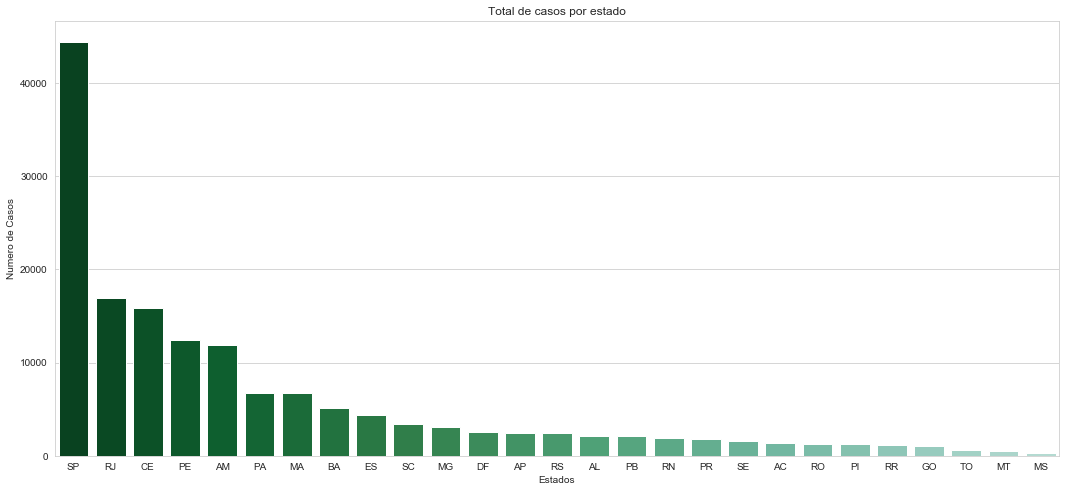

In [19]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','casosNovos']].sum().sort_values(by='casosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Ajusta o tamanho do gráfico
plt.figure(figsize=(18,8))
#Imprime um gráfico de barras
sns.barplot(x='estado',y='casosNovos',data=total_casos_por_estado,
            palette=sns.color_palette("BuGn_r",n_colors=len(total_casos_por_estado)+12 ))
#Insere o título e a descrição de X e Y
plt.title('Total de casos por estado')
plt.ylabel('Numero de Casos')
plt.xlabel('Estados')

plt.show()

Estados como São Paulo, Rio de Janeiro, Ceará, Pernambuco e Amazonas têm alertado para uma possível falta de leitos de baixa complexidade e leitos de UTI devido ao grande no número de pacientes. São Paulo, cidade que possui a maior quantidade de casos confirmados, está com 90% dos seus leitos de UTI ocupados, as outras cidades mostram um número ainda maior, Rio de Janeiro está com 97%, Fortaleza 98%, Recife 99% e Manaus com 90% dos leitos baixa complexidade e 96% dos leitos de UTI ocupados. Situações como falta de vagas em hospitais é uma das principais preocupações dos governadores e prefeitos no momento, pois um colapso no sistema de saúde não impactaria apenas pacientes contaminados pelo COVID-19, mas todos os cidadãos.

              Óbitos Confirmados
regiao                          
Sudeste                     5551
Nordeste                    2981
Norte                       1716
Sul                          266
Centro-Oeste                 113


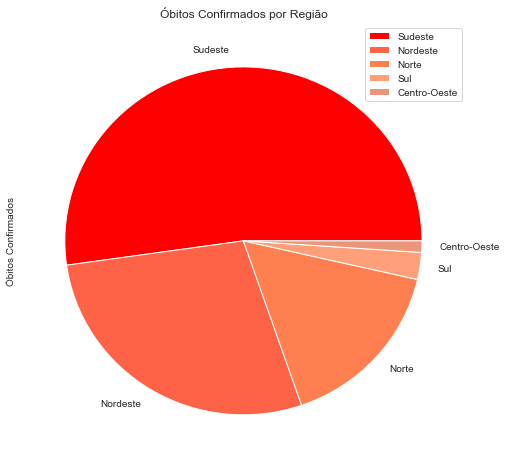

In [20]:
#Fazer grafico de Obitos por região
total_casos_por_regiao = cv.groupby('regiao')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
total_casos_por_regiao.columns = ['Óbitos Confirmados']

print(total_casos_por_regiao)
#Aumentar tamanho da legenda 
plt.rcParams['legend.fontsize'] = 10
#Imprime o gráfico de pizza
total_casos_por_regiao.plot(kind='pie',subplots=True,figsize=(8,8),colors=['#FF0000','#FF6347','#FF7F50','#FFA07A','#E9967A'])
#Insere o título
plt.title('Óbitos Confirmados por Região')

plt.show()

Outro ponto preocupante é o aumento no número de óbitos, principalmente nas regiões mais afetadas pois além risco de um colapso no sistema de saúde, há cidades enfrentando dificuldades com o sistema funerário.

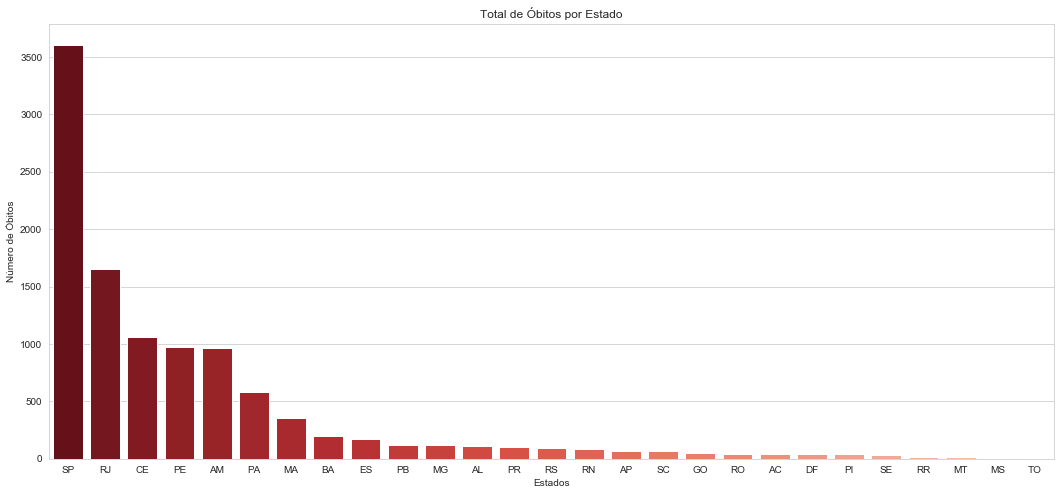

In [21]:
#Agrupa os estados e os casos, soma e ordena pela quantidade de casos
total_casos_por_estado = cv.groupby('estado')[['estado','obitosNovos']].sum().sort_values(by='obitosNovos',ascending=False)
#Remove o estado que ficou como index
total_casos_por_estado = total_casos_por_estado.reset_index()
#Imprime um gráfico de barras
plt.figure(figsize=(18,8))
sns.barplot(x='estado',y='obitosNovos',data=total_casos_por_estado,
            palette=sns.color_palette('Reds_r',n_colors=len(total_casos_por_estado)+6))
#Insere o título e a descrição de X e Y
plt.title('Total de Óbitos por Estado')
plt.ylabel('Número de Óbitos')
plt.xlabel('Estados')

plt.show()

O aumento no número de mortes tem obrigado cidades a criar medidas para evitar uma crise no sistema funerário. Manaus, que é uma das cidades mais afetadas pela epidemia, teme a falta de caixões, inclusive, encomendou 2 mil urnas com os estados de São Paulo, Santa Catarina e Rio Grande do Sul, além de realizar enterros em valas comuns devido ao alto número de mortos. No Rio de Janeiro, a prefeitura da cidade decidiu criar novas vagas no cemitério para reforçar o sistema funerário, São Paulo e Recife tem tomado atitudes semelhantes para lidar com as mortes causadas pelo novo coronavírus.